# 4. EDA after Feature Engineering

## Setup

### Loading packages:

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

### Loading dataset

In [3]:
#load dataframe:
df_eda = pd.read_csv('dataframes/eda_dataframe.csv')
df_eda.head()

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,staff_pick,creation_time_to_launch,planned_time,weekday_launched,month_launched,hour_of_day
0,successful,1950,1000.0,47,USD,23,125,games,US,False,194.546111,720.000000,Thursday,August,18:00
1,successful,22404,15000.0,271,USD,51,108,music,US,False,5398.295000,720.000000,Monday,May,06:00
2,successful,2820,2800.0,3,USD,40,121,publishing,US,False,98.460000,720.000000,Monday,December,21:00
3,successful,3725,3500.0,35,USD,31,134,music,US,False,3824.832222,720.000000,Thursday,April,03:00
4,successful,3890,2500.0,71,USD,51,123,music,US,False,261.915000,722.075278,Wednesday,September,00:00


### Inspecting the target variable:

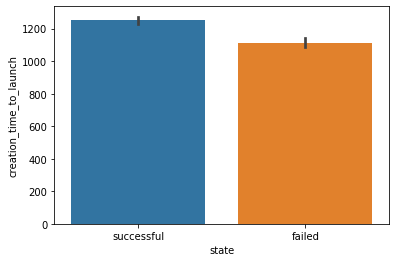

In [4]:
sns.barplot(df_eda['state'], 
            df_eda['creation_time_to_launch']).set_title('');

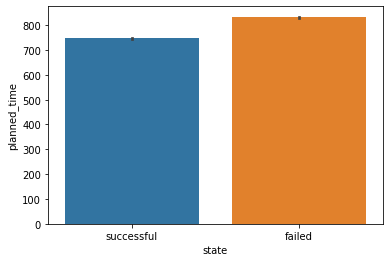

In [5]:
sns.barplot(df_eda['state'], 
            df_eda['planned_time']).set_title('');

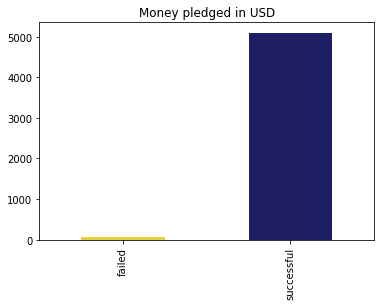

In [14]:
color = cm.CMRmap(np.linspace(0.8,0.10,df_eda.state.nunique()))
ax = df_eda.groupby('state').converted_pledged_amount.median().plot(kind='bar', color=color)
plt.xlabel('')
plt.ylabel('')
plt.title('Money pledged in USD')
plt.show();

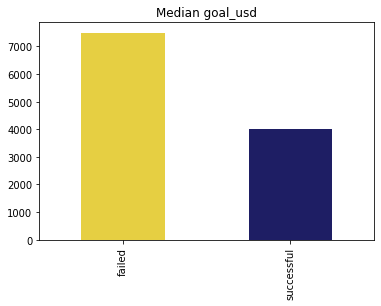

In [18]:
color = cm.CMRmap(np.linspace(0.8,0.10,df_eda.state.nunique()))
ax = df_eda.groupby('state').goal_usd.median().plot(kind='bar', color=color)
plt.xlabel('')
plt.ylabel('')
plt.title('Median goal_usd')
plt.show();

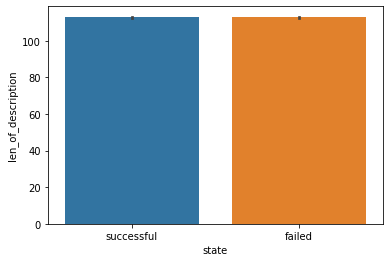

In [10]:
sns.barplot(df_eda['state'], 
            df_eda['len_of_description']).set_title('');

### Visualizing categories:
#### Overview: succesfull vs. failed projects

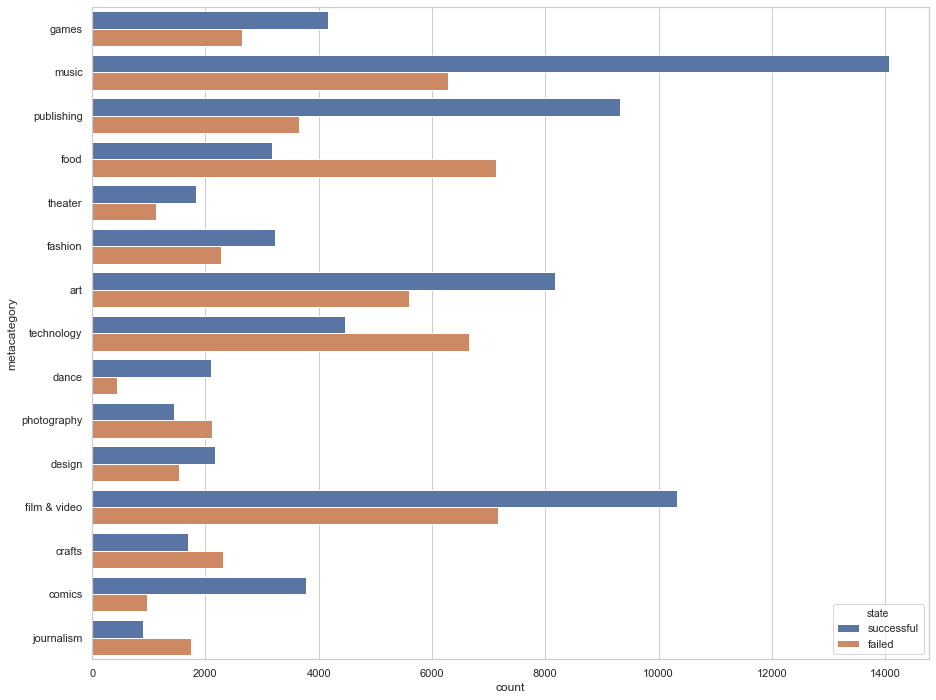

In [67]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,12)})
sns.countplot(y="metacategory", hue='state', data=df_eda);

#### A Deeper Look into categories:

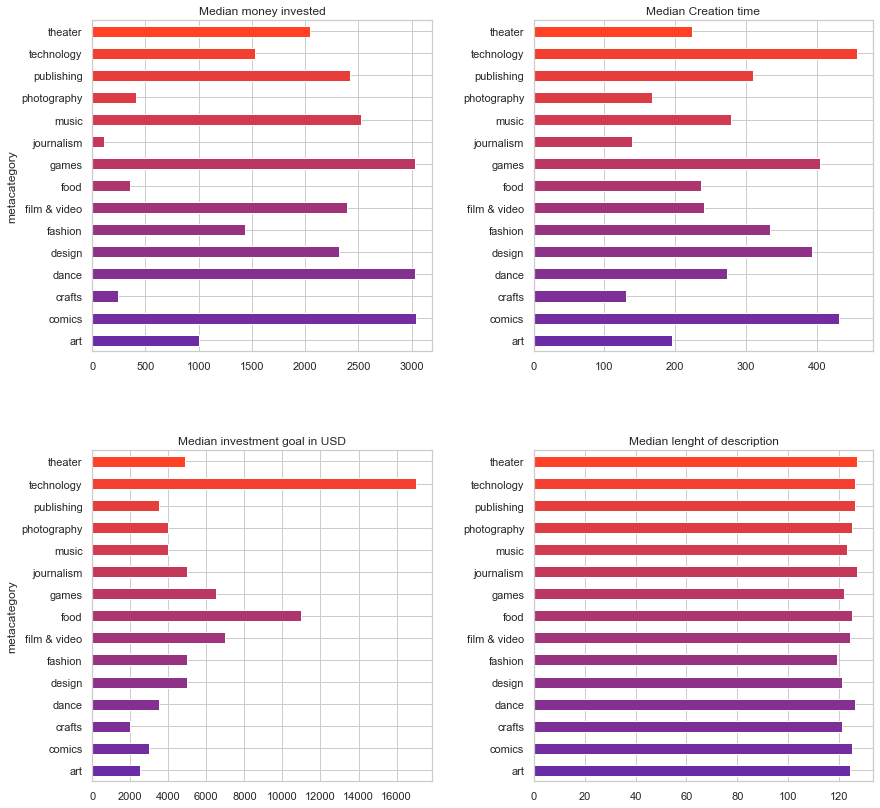

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,14))

color = cm.CMRmap(np.linspace(0.3,0.5,df_eda.metacategory.nunique()))


df_eda.groupby('metacategory').converted_pledged_amount.median().plot(kind='barh', ax=ax1, color=color)
ax1.set_title('Median money invested')
ax1.set_xlabel('')

df_eda.groupby('metacategory').creation_time_to_launch.median().plot(kind='barh', ax=ax2, color=color)
ax2.set_title('Median Creation time')
ax2.set_xlabel('')
ax2.set_ylabel('')

df_eda.groupby('metacategory').goal_usd.median().plot(kind='barh', ax=ax3, color=color)
ax3.set_title('Median investment goal in USD')
ax3.set_xlabel('')

df_eda.groupby('metacategory').len_of_description.median().plot(kind='barh', ax=ax4, color=color)
ax4.set_title('Median lenght of description')
ax4.set_xlabel('')
ax4.set_ylabel('')

fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Visualizing time-related variables:

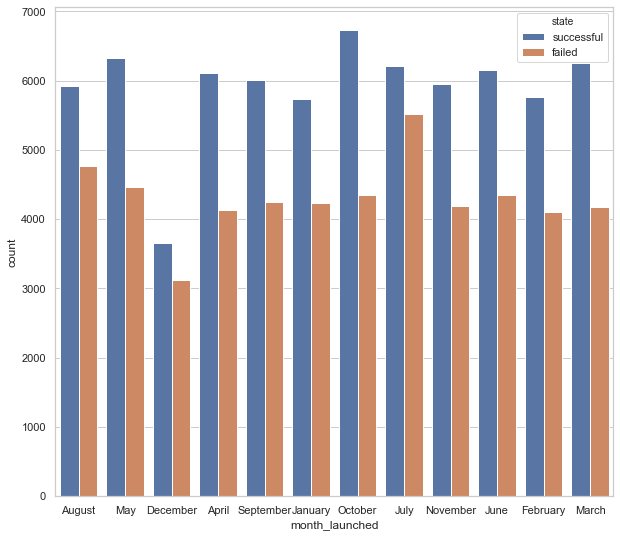

In [37]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,9)})
sns.countplot(x="month_launched", hue='state', data=df_eda);

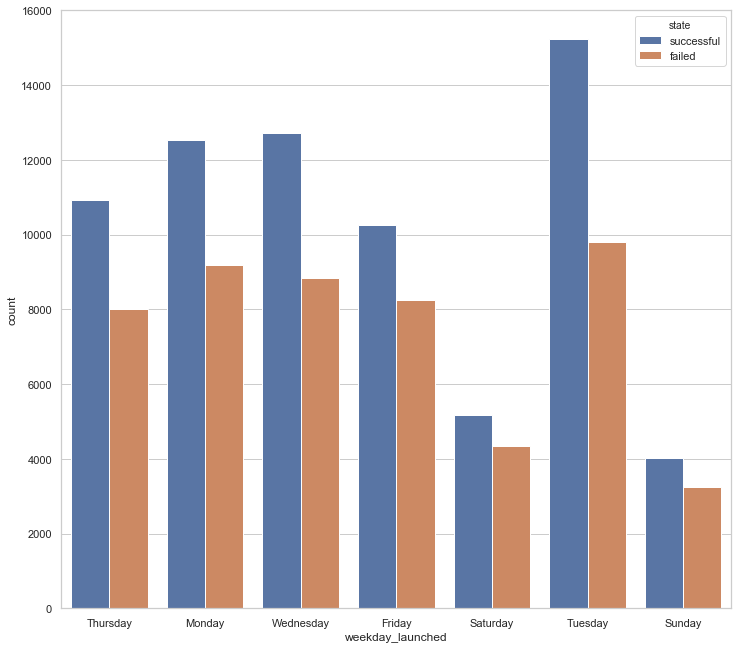

In [68]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,11)})
sns.countplot(x="weekday_launched", hue='state', data=df_eda);

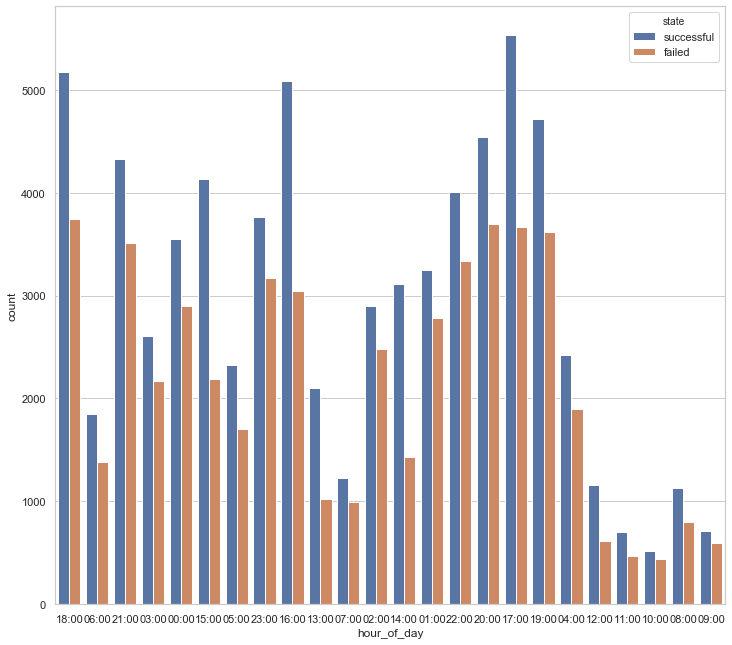

In [78]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,11)})
sns.countplot(x="hour_of_day", hue='state', data=df_eda);

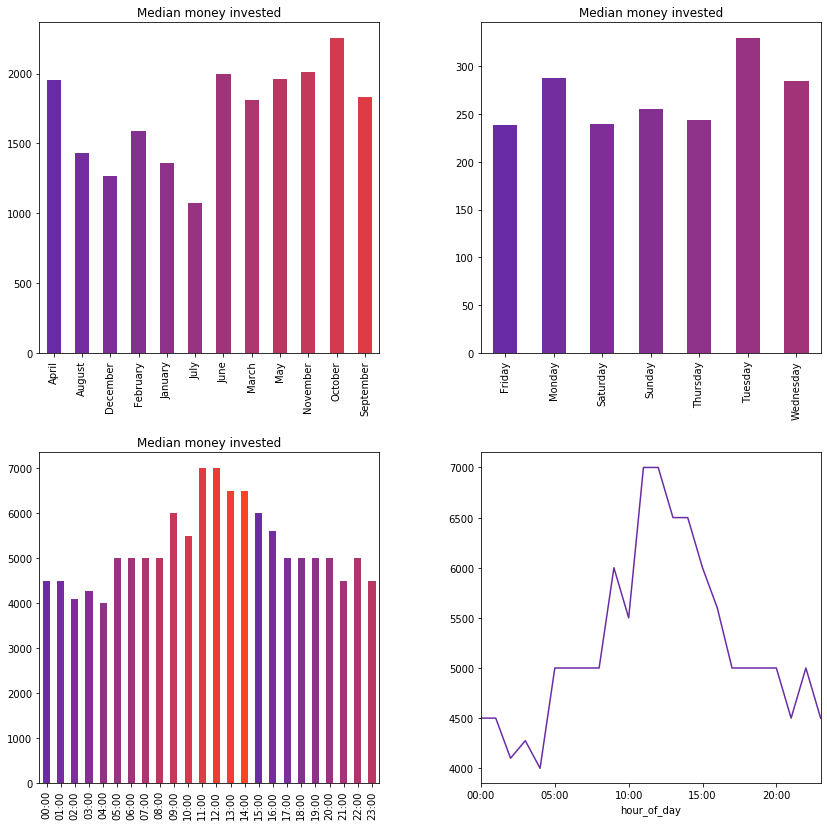

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,14))

color = cm.CMRmap(np.linspace(0.3,0.5,df_eda.metacategory.nunique()))


df_eda.groupby('month_launched').converted_pledged_amount.median().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Median money invested')
ax1.set_xlabel('')

df_eda.groupby('weekday_launched').creation_time_to_launch.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median money invested')
ax2.set_xlabel('')
ax2.set_ylabel('')

df_eda.groupby('hour_of_day').goal_usd.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median money invested')
ax3.set_xlabel('')

df_eda.groupby('hour_of_day').goal_usd.median().plot(kind='line', ax=ax4, color=color)
ax3.set_title('Median money invested')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

**Problem: Order of the bars -> further investigation needed**

### Numeric features

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122508 entries, 0 to 122507
Data columns (total 15 columns):
state                       122508 non-null object
converted_pledged_amount    122508 non-null int64
goal_usd                    122508 non-null float64
backers_count               122508 non-null int64
currency                    122508 non-null object
len_of_name                 122508 non-null int64
len_of_description          122508 non-null int64
metacategory                122508 non-null object
country                     122508 non-null object
staff_pick                  122508 non-null bool
creation_time_to_launch     122508 non-null float64
planned_time                122508 non-null float64
weekday_launched            122508 non-null object
month_launched              122508 non-null object
hour_of_day                 122508 non-null object
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 13.2+ MB


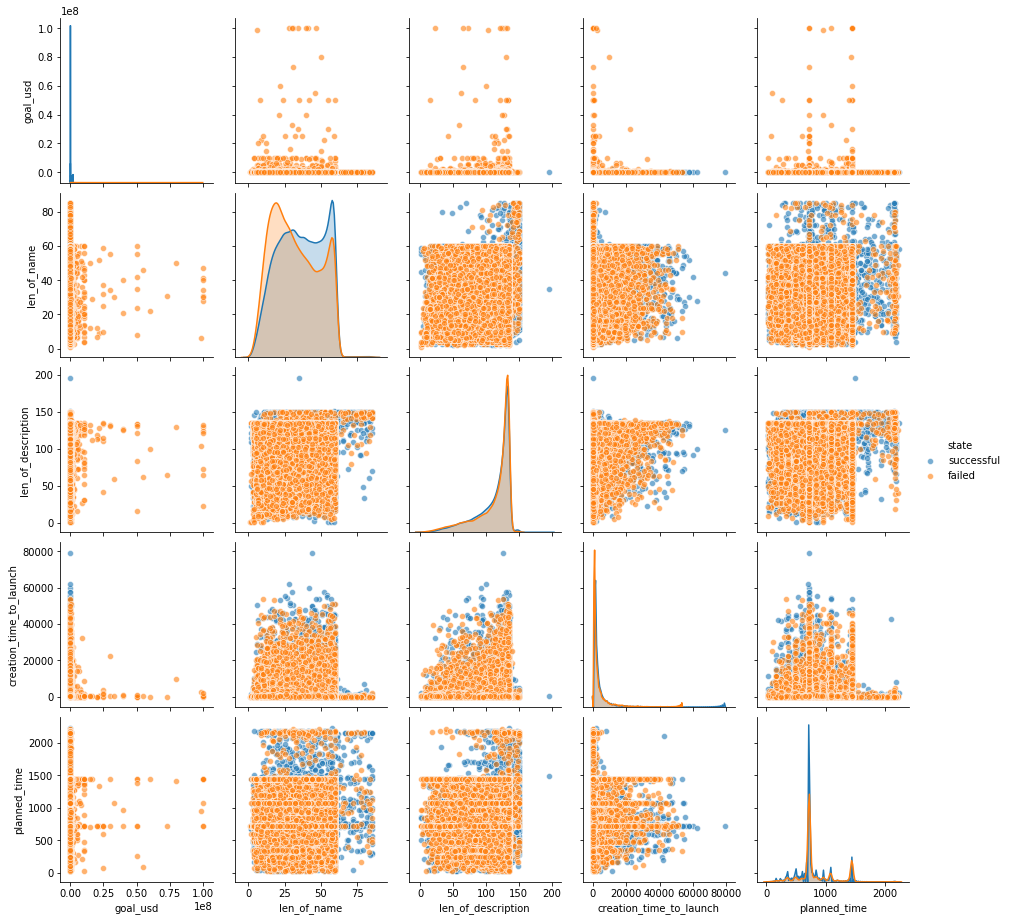

In [16]:
sns.pairplot(df_eda, vars=['goal_usd', 'len_of_name', 'len_of_description', 'creation_time_to_launch', 'planned_time'], hue='state', plot_kws={'alpha':0.6});

* the diagonal (histograms) show a skewed distribution, therefore scaling in the modelling process seems to be relevant

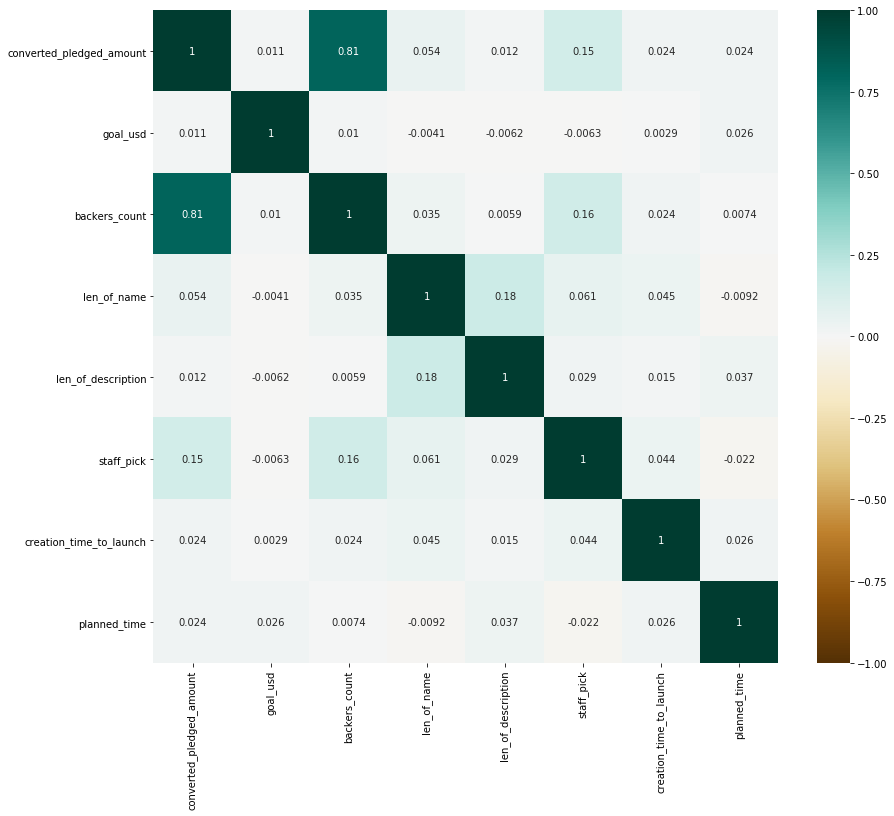

In [21]:
# Getting the big picture (Heatmap) numerical, how useful depending on the variables:
correlation = df_eda.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0, vmin = -1, cmap="BrBG")